In [ ]:
#Data Source:https://www.kaggle.com/datasets/ayessa/salary-prediction-classification

In [115]:
import pandas as pd
import numpy as np

In [116]:
df = pd.read_csv("path\\salary.csv")

# Investigate the dataset

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [118]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [119]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [120]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

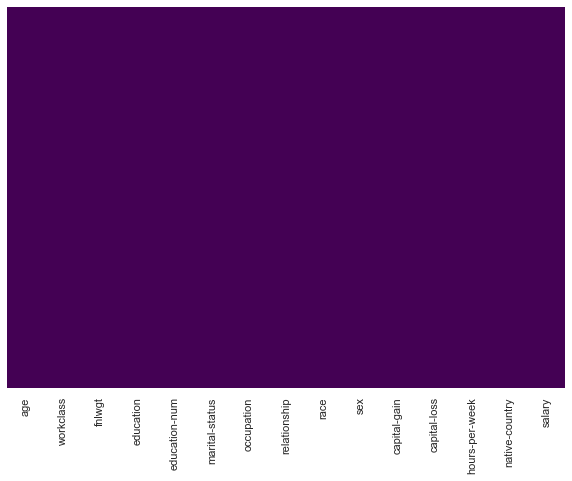

In [121]:
#Check for missing data visually
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [122]:
#find all categorical variables and their unique values
def select_categorical_values(df):
    df_categorical=df.select_dtypes(include=['object'])
    for col in list(df_categorical):
        print(col)
        print(df_categorical[col].unique())
        
select_categorical_values(df)

workclass
[' State-gov' ' Self-emp-not-inc' ' Private' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
education
[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
marital-status
[' Never-married' ' Married-civ-spouse' ' Divorced'
 ' Married-spouse-absent' ' Separated' ' Married-AF-spouse' ' Widowed']
occupation
[' Adm-clerical' ' Exec-managerial' ' Handlers-cleaners' ' Prof-specialty'
 ' Other-service' ' Sales' ' Craft-repair' ' Transport-moving'
 ' Farming-fishing' ' Machine-op-inspct' ' Tech-support' ' ?'
 ' Protective-serv' ' Armed-Forces' ' Priv-house-serv']
relationship
[' Not-in-family' ' Husband' ' Wife' ' Own-child' ' Unmarried'
 ' Other-relative']
race
[' White' ' Black' ' Asian-Pac-Islander' ' Amer-Indian-Eskimo' ' Other']
sex
[' Male' ' Female']
native-country
[' United-States' ' Cuba' ' Jamaica' ' India' '

<AxesSubplot:xlabel='workclass', ylabel='count'>

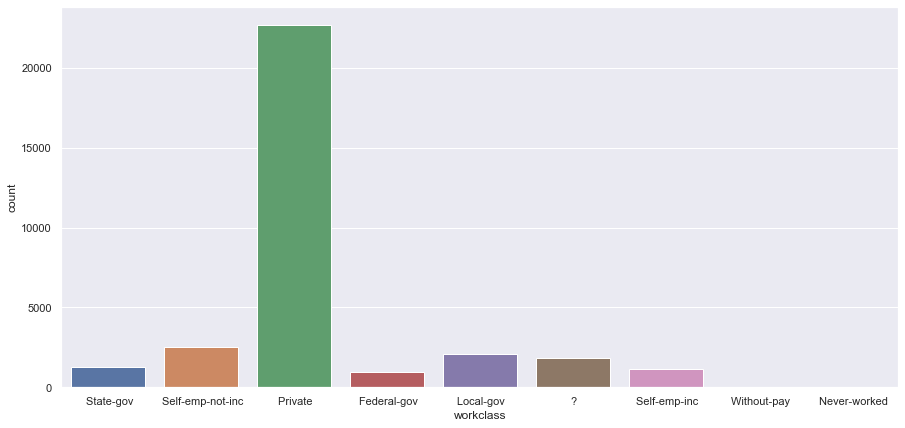

In [123]:
#We see there is an imbalance of data in terms of working class. The vast majority belongs to the private sector.
sns.set(rc={"figure.figsize":(15, 7)})
sns.countplot(x='workclass',data=df)

In [124]:
#since the majority of workclass belong to Private, the remaining categories can be grouped.
df['workclass'] =np.where(df['workclass'].str.contains('Private', regex= True), "Private", 'others')

In [125]:
df['workclass'].value_counts()

Private    22696
others      9865
Name: workclass, dtype: int64

<AxesSubplot:xlabel='education', ylabel='count'>

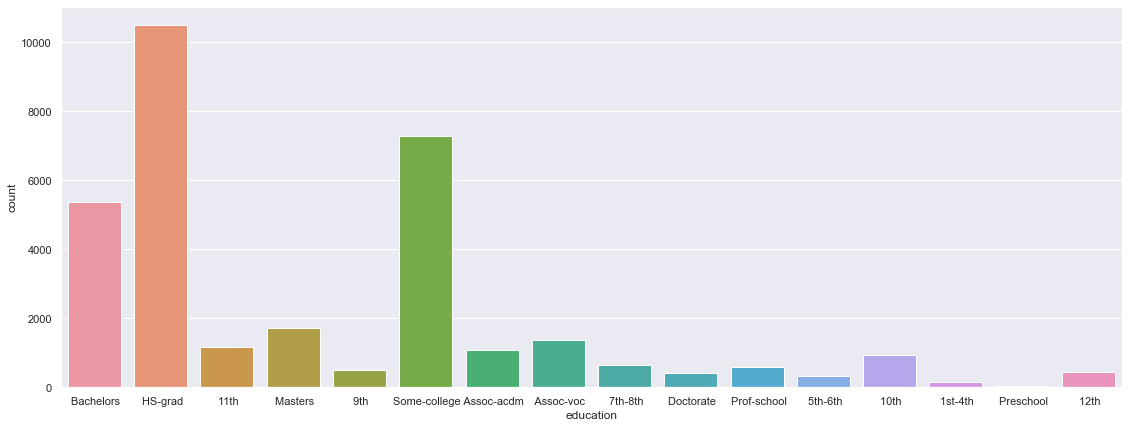

In [126]:
sns.set(rc={"figure.figsize":(19, 7)})
sns.countplot(x='education',data=df)

<AxesSubplot:xlabel='education-num', ylabel='count'>

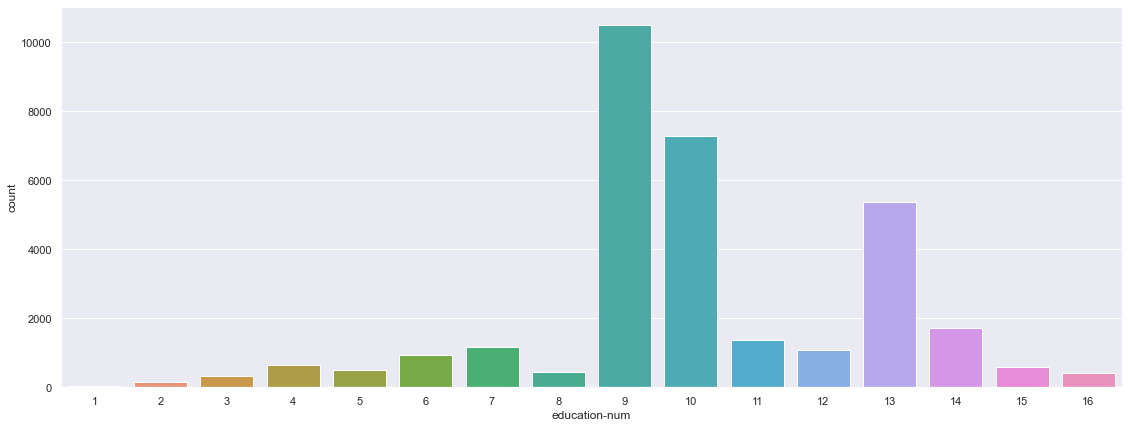

In [127]:
sns.set(rc={"figure.figsize":(19, 7)})
sns.countplot(x='education-num',data=df)

<AxesSubplot:xlabel='marital-status', ylabel='count'>

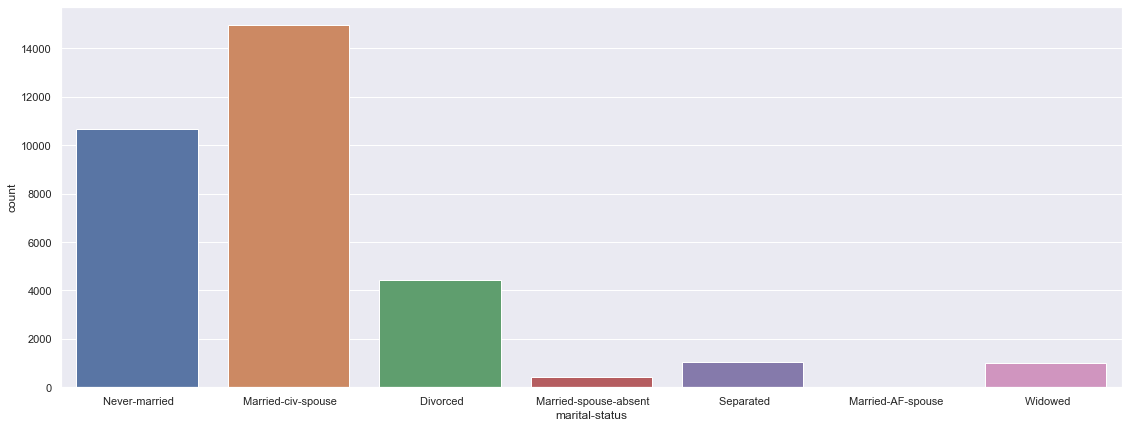

In [128]:
sns.set(rc={"figure.figsize":(19, 7)})
sns.countplot(x='marital-status',data=df)

In [129]:
#Group all married categories together
df['marital-status'] =np.where(df['marital-status'].str.contains('Married', regex= True), "Married", df['marital-status'])
df['marital-status'].value_counts()

Married           15417
 Never-married    10683
 Divorced          4443
 Separated         1025
 Widowed            993
Name: marital-status, dtype: int64

<AxesSubplot:xlabel='occupation', ylabel='count'>

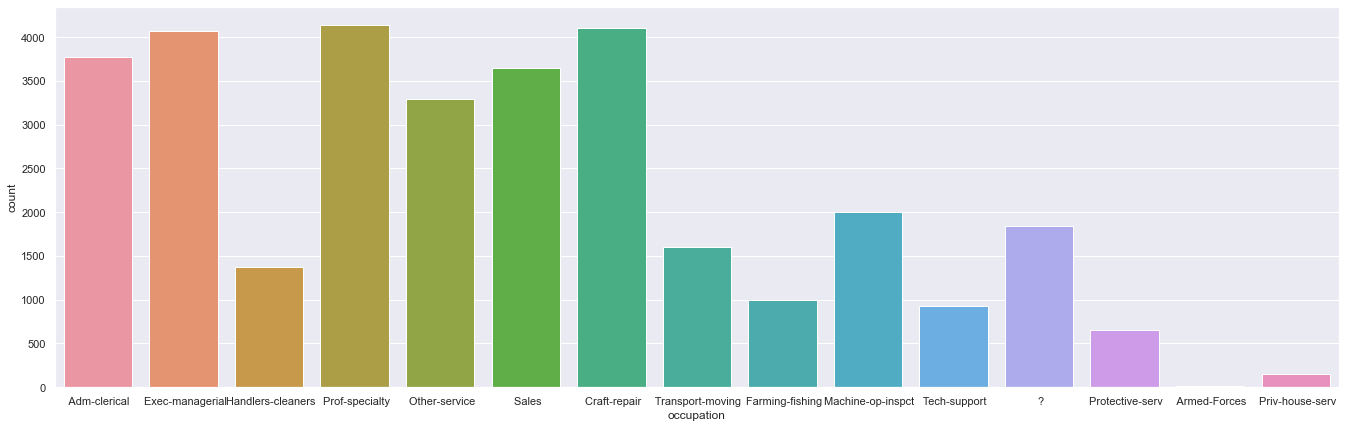

In [130]:
sns.set(rc={"figure.figsize":(23, 7)})
sns.countplot(x='occupation',data=df)

<AxesSubplot:xlabel='relationship', ylabel='count'>

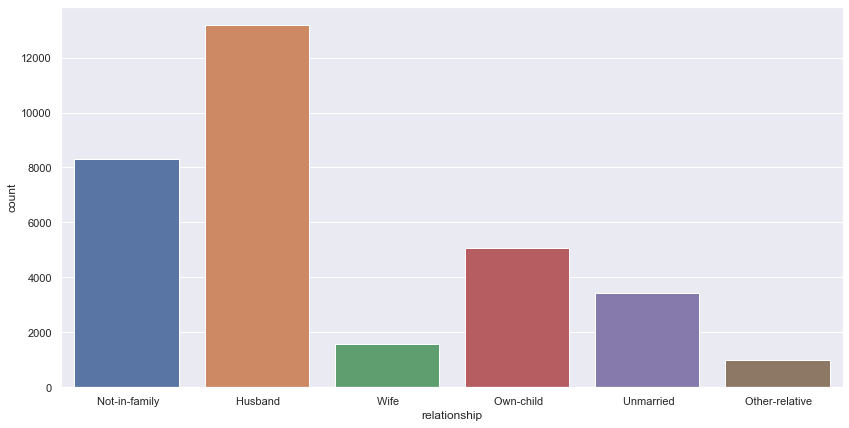

In [131]:
sns.set(rc={"figure.figsize":(14, 7)})
sns.countplot(x='relationship',data=df)

<AxesSubplot:xlabel='race', ylabel='count'>

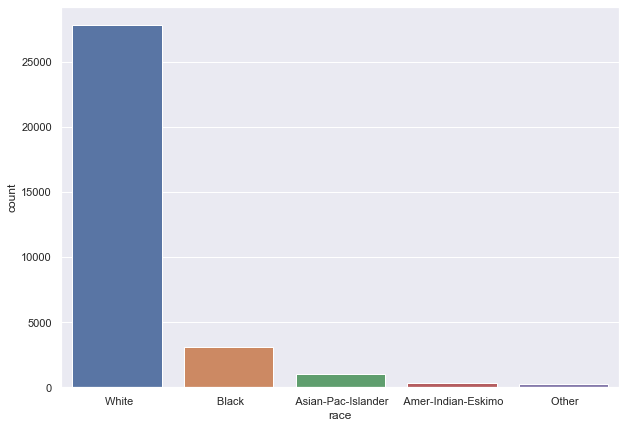

In [132]:
#Again there is imbalance of data since most of the records belong to white race
sns.set(rc={"figure.figsize":(10, 7)})
sns.countplot(x='race',data=df)

In [133]:
#Since the majority of races belong to White, the remaining categories can be grouped.
df['race'] =np.where(df['race'].str.contains('White', regex= True), "White", 'others')
df['race'].value_counts()

White     27816
others     4745
Name: race, dtype: int64

<AxesSubplot:xlabel='sex', ylabel='count'>

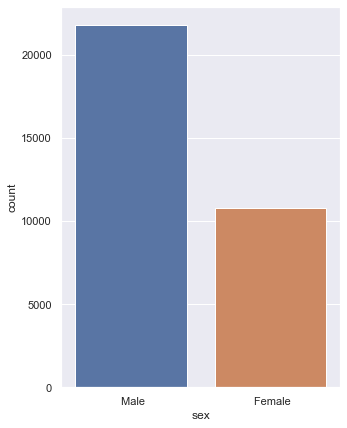

In [134]:
sns.set(rc={"figure.figsize":(5, 7)})
sns.countplot(x='sex',data=df)

In [135]:
#Imbalance of data since most of the records are from US
df['native-country'].value_counts(ascending=False)

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [136]:
df['native-country'] =np.where(df['native-country'].str.contains('United-States', regex= True), "USA", 'others')

In [137]:
df.head(50)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,others,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,USA,<=50K
1,50,others,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,0,0,13,USA,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,USA,<=50K
3,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,others,Male,0,0,40,USA,<=50K
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,others,Female,0,0,40,others,<=50K
5,37,Private,284582,Masters,14,Married,Exec-managerial,Wife,White,Female,0,0,40,USA,<=50K
6,49,Private,160187,9th,5,Married,Other-service,Not-in-family,others,Female,0,0,16,others,<=50K
7,52,others,209642,HS-grad,9,Married,Exec-managerial,Husband,White,Male,0,0,45,USA,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,USA,>50K
9,42,Private,159449,Bachelors,13,Married,Exec-managerial,Husband,White,Male,5178,0,40,USA,>50K


<AxesSubplot:xlabel='salary', ylabel='count'>

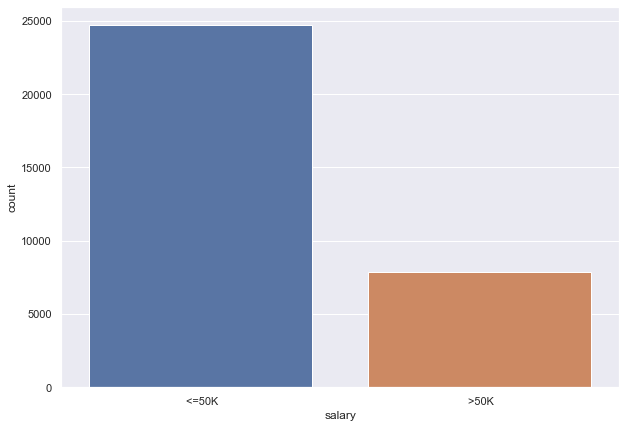

In [138]:
sns.set(rc={"figure.figsize":(10, 7)})
sns.countplot(x='salary',data=df)

In [139]:
#Select only categorical variables
df_categorical=df.select_dtypes(include=['object'])
df_categorical

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,salary
0,others,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,USA,<=50K
1,others,Bachelors,Married,Exec-managerial,Husband,White,Male,USA,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,USA,<=50K
3,Private,11th,Married,Handlers-cleaners,Husband,others,Male,USA,<=50K
4,Private,Bachelors,Married,Prof-specialty,Wife,others,Female,others,<=50K
...,...,...,...,...,...,...,...,...,...
32556,Private,Assoc-acdm,Married,Tech-support,Wife,White,Female,USA,<=50K
32557,Private,HS-grad,Married,Machine-op-inspct,Husband,White,Male,USA,>50K
32558,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,USA,<=50K
32559,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,USA,<=50K


In [140]:
#Encode all categorical variables using factorize
df['workclass_d']=df.workclass.factorize()[0]
df['education_d']=df.education.factorize()[0]
df['marital-status_d']=df['marital-status'].factorize()[0]
df['occupation_d']=df.occupation.factorize()[0]
df['relationship_d']=df.relationship.factorize()[0]
df['race_d']=df.race.factorize()[0]
df['sex_d']=df.sex.factorize()[0]
df['native-country_d']=df['native-country'].factorize()[0]
df['salary_d']=df.salary.factorize()[0]

In [141]:
df.head(5)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,...,salary,workclass_d,education_d,marital-status_d,occupation_d,relationship_d,race_d,sex_d,native-country_d,salary_d
0,39,others,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,<=50K,0,0,0,0,0,0,0,0,0
1,50,others,83311,Bachelors,13,Married,Exec-managerial,Husband,White,Male,...,<=50K,0,0,1,1,1,0,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,<=50K,1,1,2,2,0,0,0,0,0
3,53,Private,234721,11th,7,Married,Handlers-cleaners,Husband,others,Male,...,<=50K,1,2,1,2,1,1,0,0,0
4,28,Private,338409,Bachelors,13,Married,Prof-specialty,Wife,others,Female,...,<=50K,1,0,1,3,2,1,1,1,0


In [142]:
#Check correlation of our dependent variable with all the other variables
df.corr()['salary_d'].sort_values(ascending=False)

salary_d            1.000000
education-num       0.335154
age                 0.234037
hours-per-week      0.229689
capital-gain        0.223329
capital-loss        0.150526
marital-status_d    0.050289
fnlwgt             -0.009463
native-country_d   -0.034470
education_d        -0.046218
workclass_d        -0.078528
race_d             -0.085224
occupation_d       -0.104691
relationship_d     -0.171294
sex_d              -0.215980
Name: salary_d, dtype: float64

<AxesSubplot:>

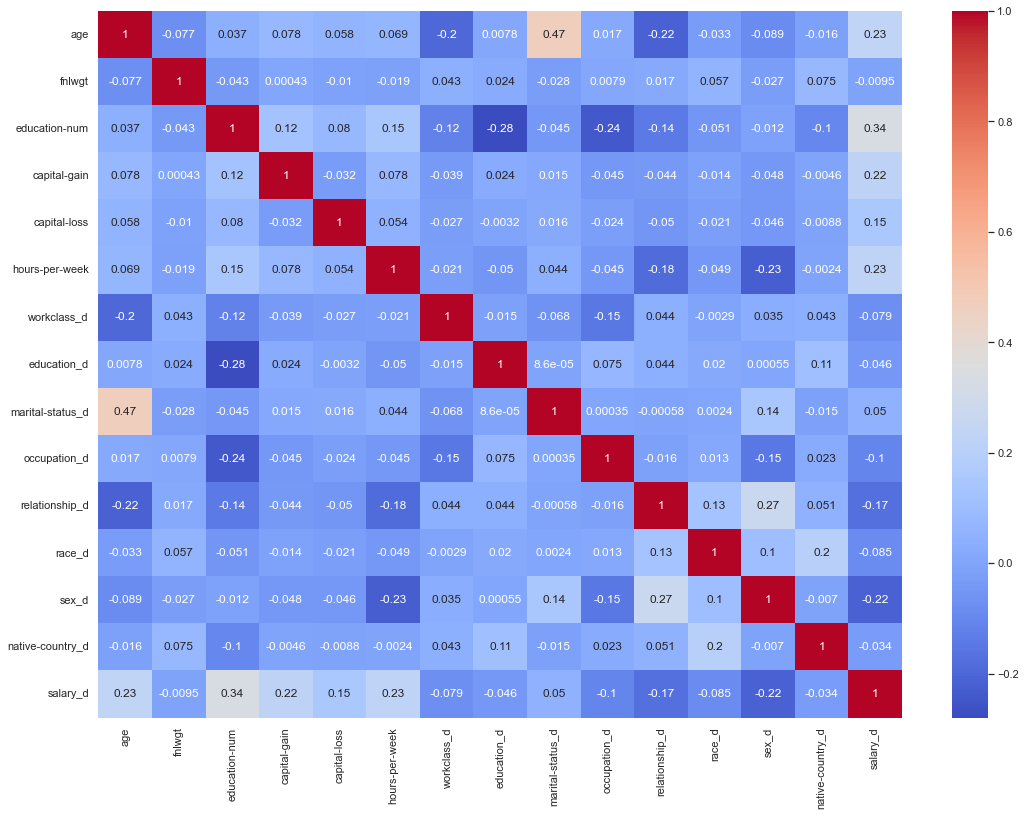

In [143]:
plt.figure(figsize= (18,13))
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

<AxesSubplot:>

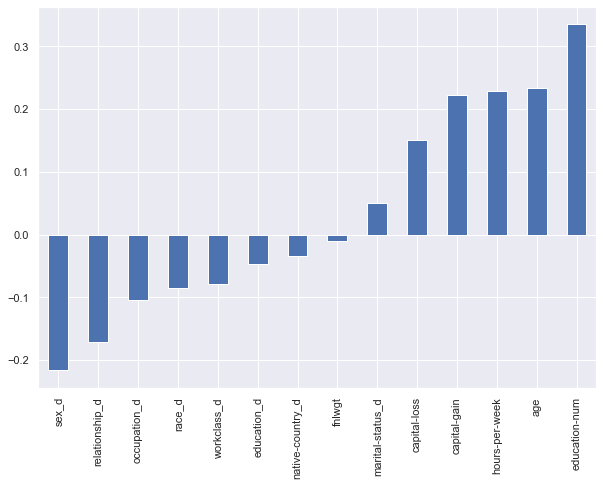

In [144]:
#Check correlation of all variables with salary. Marital status and fnlwgt don't seem to be related to salary
df.corr()['salary_d'][:-1].sort_values().plot(kind='bar')

In [145]:
#Drop unneccessary variables.
df=df.drop(['marital-status','fnlwgt','marital-status_d','native-country_d'],axis=1)

# Check which number corresponds to each label for each column

In [146]:
df.pivot_table(index="sex",values='sex_d', aggfunc='mean')

,sex_d
sex,
Female,1
Male,0


In [147]:
df.pivot_table(index="salary",values='salary_d', aggfunc='mean')

,salary_d
salary,
<=50K,0
>50K,1


In [148]:
df.pivot_table(index="relationship",values='relationship_d', aggfunc='mean')

,relationship_d
relationship,
Husband,1
Not-in-family,0
Other-relative,5
Own-child,3
Unmarried,4
Wife,2


In [149]:
df.pivot_table(index="occupation",values='occupation_d', aggfunc='mean')

,occupation_d
occupation,
?,11
Adm-clerical,0
Armed-Forces,13
Craft-repair,6
Exec-managerial,1
Farming-fishing,8
Handlers-cleaners,2
Machine-op-inspct,9
Other-service,4


In [150]:
df.pivot_table(index="race",values='race_d', aggfunc='mean')

,race_d
race,
White,0
others,1


In [151]:
df.pivot_table(index="education",values='education_d', aggfunc='mean')

,education_d
education,
10th,12
11th,2
12th,15
1st-4th,13
5th-6th,11
7th-8th,8
9th,4
Assoc-acdm,6
Assoc-voc,7


In [152]:
df.pivot_table(index="workclass",values='workclass_d', aggfunc='mean')

,workclass_d
workclass,
Private,1
others,0


# Data preprocessing

In [65]:
# Applying train test split
X = df.select_dtypes(include='number').drop('salary_d',axis=1)
y = df['salary_d']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)

In [66]:
#Scaling features,since it is necessary in order to perform RNN
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Model creation

In [42]:
#Creating the model. Use early stopping and dropouts in order to avoid overfitting of the training data and overtraining it.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [19]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [20]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
764/764 [==============================] - 3s 3ms/step - loss: 0.5238 - val_loss: 0.4520
Epoch 2/600
764/764 [==============================] - 2s 3ms/step - loss: 0.4670 - val_loss: 0.4135
Epoch 3/600
764/764 [==============================] - 2s 3ms/step - loss: 0.4333 - val_loss: 0.3803
Epoch 4/600
764/764 [==============================] - 2s 3ms/step - loss: 0.4100 - val_loss: 0.3549
Epoch 5/600
764/764 [==============================] - 2s 3ms/step - loss: 0.3963 - val_loss: 0.3490
Epoch 6/600
764/764 [==============================] - 2s 3ms/step - loss: 0.3843 - val_loss: 0.3427
Epoch 7/600
764/764 [==============================] - 2s 3ms/step - loss: 0.3821 - val_loss: 0.3347
Epoch 8/600
764/764 [==============================] - 2s 3ms/step - loss: 0.3738 - val_loss: 0.3318
Epoch 9/600
764/764 [==============================] - 2s 3ms/step - loss: 0.3732 - val_loss: 0.3308
Epoch 10/600
764/764 [==============================] - 2s 3ms/step - loss: 0.3702 - val_lo

<AxesSubplot:>

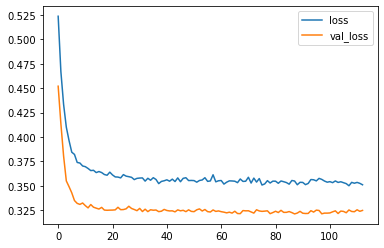

In [21]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [22]:
#Model evaluation
predictions = (model.predict(X_test) > 0.5).astype("int32")

255/255 [==============================] - 1s 2ms/step


In [23]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6222
           1       0.79      0.51      0.62      1919

    accuracy                           0.85      8141
   macro avg       0.83      0.73      0.76      8141
weighted avg       0.85      0.85      0.84      8141



In [24]:
print(confusion_matrix(y_test,predictions))

[[5965  257]
 [ 939  980]]


Use under sampling method to handle inbalance of our binary classes and improve accuracy of our model

In [67]:
import imblearn

In [68]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
x_rus, y_rus = rus.fit_resample(X, y)
y_rus.shape

(15682,)

In [99]:
y.shape

(32561,)

In [100]:
x_rus.shape

(15682, 11)

In [69]:
#Rerun the model again with the sample we selected
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_rus,y_rus,test_size=0.25,random_state=101)

In [70]:
#Scaling features,since it is necessary in order to perform RNN
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [71]:
#Creating the model. Use early stopping and dropouts in order to avoid overfitting of the training data and overtrain it.
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

In [72]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [73]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

Epoch 1/600
368/368 [==============================] - 1s 2ms/step - loss: 0.6535 - val_loss: 0.5867
Epoch 2/600
368/368 [==============================] - 1s 2ms/step - loss: 0.5895 - val_loss: 0.5329
Epoch 3/600
368/368 [==============================] - 1s 2ms/step - loss: 0.5579 - val_loss: 0.5051
Epoch 4/600
368/368 [==============================] - 1s 2ms/step - loss: 0.5375 - val_loss: 0.4842
Epoch 5/600
368/368 [==============================] - 1s 2ms/step - loss: 0.5170 - val_loss: 0.4629
Epoch 6/600
368/368 [==============================] - 1s 2ms/step - loss: 0.5007 - val_loss: 0.4444
Epoch 7/600
368/368 [==============================] - 1s 2ms/step - loss: 0.4904 - val_loss: 0.4376
Epoch 8/600
368/368 [==============================] - 1s 2ms/step - loss: 0.4881 - val_loss: 0.4268
Epoch 9/600
368/368 [==============================] - 1s 2ms/step - loss: 0.4735 - val_loss: 0.4197
Epoch 10/600
368/368 [==============================] - 1s 2ms/step - loss: 0.4714 - val_lo

<AxesSubplot:>

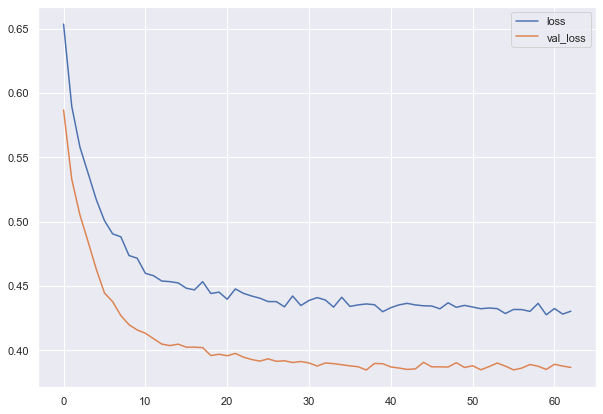

In [74]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model evaluation

In [75]:

predictions = (model.predict(X_test) > 0.5).astype("int32")

123/123 [==============================] - 0s 1ms/step


In [76]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.78      0.81      1991
           1       0.79      0.86      0.82      1930

    accuracy                           0.82      3921
   macro avg       0.82      0.82      0.82      3921
weighted avg       0.82      0.82      0.82      3921



In [77]:
print(confusion_matrix(y_test,predictions))

[[1544  447]
 [ 262 1668]]
